In [207]:
import selenium as se
from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re

In [208]:
driver = webdriver.Firefox()
driver.get("https://ms.polsl.pl/pracownicy.php")

In [209]:
# ### testowanie sprawdzanie
 
# employeeList = driver.find_element(By.ID, "content")
# # rows = employeeList.find_elements(By.CLASS_NAME, "pracownik")
# rows = employeeList.find_elements(By.XPATH, ".//a[@class='light' and starts-with(@href, 'pracownik.php?kod=')]")
# employeeData = []
# print(len(rows))

# row = rows[0]
# driver.execute_script("arguments[0].scrollIntoView();", row)
# wait = WebDriverWait(driver, 10)
# row = wait.until(EC.element_to_be_clickable(row))

# time.sleep(1)
# print(row.get_attribute("href"))

# row.find_element(By.CLASS_NAME, "pracownik-foto").click()

# # row.click()
# # action = webdriver.ActionChains(driver)
# # action.click(row).perform() 
# time.sleep(2)
# driver.back()

In [213]:
employeeList = driver.find_element(By.ID, "content")
rows = employeeList.find_elements(By.XPATH, ".//a[@class='light' and starts-with(@href, 'pracownik.php?kod=')]")
employeeData = []
print("Ilość wierszy: ", len(rows))

i = 0

for row in rows:

    # i += 1
    
    time.sleep(0.2)
    # wyciągnięcie imienia
    employeeDesc = row.find_element(By.CLASS_NAME, "pracownik")
    text = employeeDesc.find_element(By.TAG_NAME, "strong")
    text = text.get_attribute("innerHTML")
    name = text.split("<br>")[0]
    regex = r"dr|hab\.|inż\.|prof\.|mgr|lic\.|dziekan|prodziekan|PŚ|\,|<.*?>"
    name = re.sub(regex, "", name)
    name = name.strip()

    # wyciągnięcie linku
    link = employeeDesc.find_element(By.CLASS_NAME, "pracownik-foto")
    
    # przescrollowanie do linku
    driver.execute_script("arguments[0].scrollIntoView();", link)

    # otwarcie linku w nowej karcie
    webdriver.ActionChains(driver).key_down(Keys.CONTROL).click(link).key_up(Keys.CONTROL).perform()

    # zmiana okna
    current_window = driver.current_window_handle
    windows = driver.window_handles
    driver.switch_to.window(windows[-1])
    
    time.sleep(0.2)

    # wyciągnięcie prac naukowych
    # obcięcie od "Najważniejsze prace naukowe:" do końca, i wsadzenie do listy
    allData = driver.find_element(By.ID, "content")
    publicationsData = allData.text.split("Najważniejsze prace naukowe:")[-1] 
    publications = [x.strip() for x in publicationsData.split("\n") if x.strip()]
    # print(len(publications))

    # powrót do poprzedniego okna
    driver.close()
    driver.switch_to.window(current_window)

    employeeData.append([name, len(publications)])
    
    # if(i>20):
    #     break

print(employeeData)

df = pd.DataFrame(employeeData, columns=["Imie Nazwisko", "Ilość"])
df.to_csv('prace-naukowe.csv', index=False)

Ilość wierszy:  74
[['Marcin Adam', 4], ['Katarzyna Aianowicz', 3], ['Orest Artemovych', 6], ['Lech Bartłomiejczyk', 6], ['Agnieszka Bier', 5], ['Barbara Biły', 5], ['Marek Błasik', 7], ['Mykola Bratiichuk', 4], ['Rafał Brociek', 8], ['Giacomo Capizzi', 8], ['Robertas Damaševičius', 8], ['Ewelina Domalik', 8], ['Ryszard Frankiewicz', 8], ['Michał Gacki', 5], ['Henryk Gacki', 25], ['Piotr Gawron', 5], ['Zuzanna Grabarz', 9], ['Edyta Hetmaniok', 5], ['Waldemar Hołubowski', 5], ['Krzysztof Jelito', 10], ['Konrad Kaczmarek', 2], ['Aian Kapczyński', 4], ['Jarosław Karcewicz', 4], ['Wojciech Kempa', 5], ['Roman Kluger', 6], ['Martyna Kobielnik', 8], ['Katarzyna Komorowska', 1], ['Marianna Konkol', 6], ['Paweł Kozyra', 7], ['Viktor Kulyk', 5], ['Sławomir Kusiński', 9], ['Marcin Lawnik', 10], ['Jakub Jan Ludew', 9], ['Ewa Łobos', 12], ['Martyna Maciaszczyk', 9], ['Zbigniew Marszałek', 5], ['Elwira Mateja-Losa', 5], ['Marek Morawiak', 6], ['Iwona Nowak', 5], ['Bogdana Oliynyk', 6], ['Sebastian 

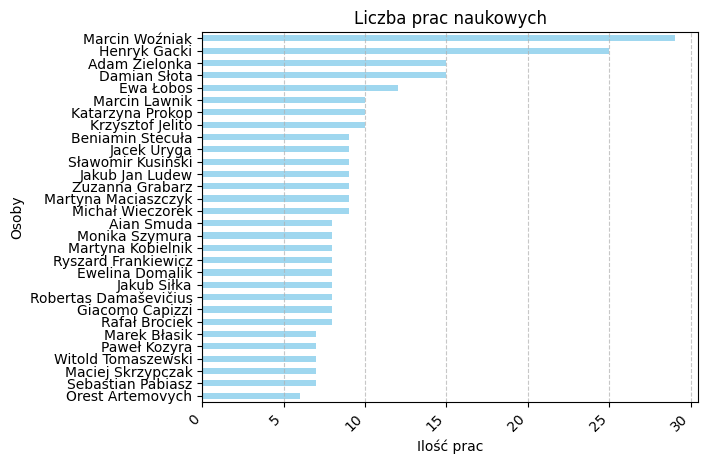

In [248]:

df = pd.DataFrame(employeeData, columns=["Imie Nazwisko", "Ilość"])
# df['Skrócone Imię'] = df['Imie Nazwisko'].apply(lambda x: f"{x.split()[0]} {x.split()[-1][0]}.")

df = df.nlargest(30, 'Ilość')
# plt.figure(figsize=(12, 20))

df.sort_values('Ilość', ascending=True).plot(
    x='Imie Nazwisko', y='Ilość', kind='barh', legend=False, color='skyblue', alpha=0.8
)

plt.xlabel('Ilość prac')
plt.ylabel('Osoby')
plt.title('Liczba prac naukowych')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [211]:
# startElement = driver.find_element(By.XPATH, "//b[text()='Najważniejsze prace naukowe:']")
# # startElement = driver.find_element(By.XPATH, "//br[preceding-sibling::b[text()='Najważniejsze prace naukowe:']]")
# # publicationsData = startElement.find_elements(By.XPATH, "following-sibling::*")
# publicationsData = startElement.find_elements(By.XPATH, "following-sibling::text()").strip()
# # publicationsData = startElement.get_attribute("outerHTML")
# print("publicationsData: ", publicationsData)
# publications = []

# # for element in publicationsData:
# #     print(element.text)
# #     if element.tag_name == "br" or element.text.strip() == "":
# #         continue
    
# #     # Dodajemy tekst do listy
# #     publications.append(element.text.strip())

# # print(publications)


In [212]:
# df = pd.DataFrame(employeeData, columns=["Imie Nazwisko"])
# df.to_csv('dane.csv', index=False)